In [14]:
import requests
requests.__version__

'2.26.0'

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-30.280071561298676 117.37245162946863
-30.869140106793814 -119.05211677619111
-84.51297411923548 -78.51377248831092
-54.660439119190386 110.76990261134677
-43.11225235635875 174.1599149148991
8.73217406693172 -21.226393446070773
-30.16054237558145 24.018027995670906
80.27081202664831 119.08331474375353
-47.70942873227576 146.4721346437397
43.94313496373053 53.94036958919918
80.16023224202189 -37.75734228581703
-30.544666492109485 -169.74518232902312
-50.153635572362646 46.26847858292504
-33.921117420596964 -81.79626829908828
25.21355457958262 -41.31534172816717
15.97541766546398 163.46622458200653
-72.38805825455475 79.37228822169544
19.973820557822265 -91.71533789918024
-73.57743336233032 -77.76584227554761
54.245813493445155 -142.84733266611488
-17.944032650181754 66.75403571276573
46.686487211276614 -40.02385262952612
41.365405653651464 -93.78448944439818
21.5446757056599 164.75209907662156
7.149754858566652 117.53169460987004
35.18629444653544 -110.47165689812812
-61.1119704945592

28.003448850751553 -145.68958562611857
23.20925716014689 153.64003274526624
47.07170818459443 -168.43028795043207
71.82888912236675 -128.8726373114595
-37.31050385780862 -38.72592656123979
-79.41581124153126 -174.78588950827128
88.5957915972219 -37.25273140505621
-72.92994803633411 -138.24512071598863
-62.393324883755795 59.97707293334503
37.30064913940434 -112.7362230177074
45.51807132165146 32.07494467590442
-44.13415117799221 78.46940574839664
6.671500436239242 -48.23560867167336
-77.60620950232081 -131.53971024564908
-88.22528750799621 -76.87246174399749
47.98116031311662 86.05927467923175
-47.952205943262356 102.38494921481333
26.871646531052733 155.23326545554642
-80.34318579005961 -54.54346455059236
68.18970945075901 -168.0126907864999
-67.2960176451076 -65.84561905437215
83.43193341850451 -22.065581255701346
-9.492912095713265 48.59929126095639
-36.31730515604109 173.22820115109585
-11.428292346424413 10.50192470381208
34.8203614289324 118.63866592164317
70.38283277701169 17.54

69.70340626682454 18.454835277050506
-41.22719687231647 34.15041284048846
-67.20806035387082 -69.82331711442608
25.314554152823604 87.70412391938402
15.1473874019335 -47.0042033791579
-68.11669961666284 173.84236054467533
11.121264571776905 -83.47083327901649
1.6194652564999643 137.5794258670623
89.69270666852589 -0.06715561991595109
24.929501370420624 153.49747248048357
44.478979187808505 -64.23487586869608
-86.67699458616234 -84.43613324575699
-72.32588399157068 -16.085095209502896
-30.752875465090042 -56.25430218367438
41.501681895137835 -73.36715247125916
3.8968345496406727 -116.16868843957491
-43.719664268850366 -160.92314983498773
-38.92881488129039 135.60345792322363
3.8979400847569963 28.64452870087291
-11.754520189795997 -48.48732884309169
9.722148603260777 -146.60362311456558
-75.75219582177456 -117.99738043667313
66.26187064238371 96.3363629717519
-45.019930565360035 135.0741490401221
-48.31399709979755 70.0425835882341
30.807041610775883 11.611002706841788
85.62017084688668

66.36283634913553 -93.92160244616719
21.22121013497555 53.778733214504115
2.0427744892413813 -170.2146944427264
14.65707679380779 -162.47399105927536
-36.3835403692638 126.5511636478567
-25.499735745108893 -109.40269175477579
75.65577440293907 -178.2858122787775
87.37736689837661 96.48706550354814
-56.905996405125926 -119.46907417912782
38.91167695024515 46.68170339848177
79.85612225887243 -100.48656190794152
54.96201055184716 -19.58625073600882
-10.739084125085924 -75.13591711143397
59.97765572828348 1.8282937006625843
13.260256362668116 36.428721764697315
-85.60821877752322 105.42495224906787
-68.5672739650942 -161.46428080292154
-86.1131750848567 145.18760393974816
41.35556256729268 -43.99347249181076
-88.84977752893516 171.46651298734764
47.01755431784596 122.2775833456493
40.284124900825276 98.10595315173487
-85.20159403332586 -119.52866879504052
-65.22133357766599 -71.86038042498933
-85.5666287701787 -6.3441758551478244
-57.72074790889528 -173.99987562940532
22.28183105923449 -51

In [43]:
from citipy import citipy

In [44]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [45]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [46]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [47]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb574116652698d6a1cc0511ed0af92b


In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [49]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | northam
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | amberley
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | de aar
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | zhanaozen
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | seybaplaya
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | quatre cocos
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | west des moines
Processing Record 23 of Set 1 | kudat
Processing Record 24 of Set 1 | winslow
P

Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | bengkulu
Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | puerto del rosario
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | simao
Processing Record 47 of Set 4 | ust-tsilma
Processing Record 48 of Set 4 | faya
Processing Record 49 of Set 4 | sulangan
Processing Record 50 of Set 4 | hof
Processing Record 1 of Set 5 | cuamba
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | klyuchevskiy
Processing Record 4 of Set 5 | sinaloa
Processing Record 5 of Set 5 | kaeo
Processing Record 6 of Set 5 | farafangana
Processing Record 7 of Set 5 | aleksandrov gay
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | haines junction
Processing Record 11 of Set 5 | la roman

Processing Record 26 of Set 8 | falealupo
City not found. Skipping...
Processing Record 27 of Set 8 | burica
City not found. Skipping...
Processing Record 28 of Set 8 | samarai
Processing Record 29 of Set 8 | salalah
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | ravar
Processing Record 33 of Set 8 | wahran
City not found. Skipping...
Processing Record 34 of Set 8 | poronaysk
Processing Record 35 of Set 8 | uirauna
Processing Record 36 of Set 8 | richard toll
City not found. Skipping...
Processing Record 37 of Set 8 | usinsk
Processing Record 38 of Set 8 | meulaboh
Processing Record 39 of Set 8 | tutoia
Processing Record 40 of Set 8 | qaqortoq
Processing Record 41 of Set 8 | airai
Processing Record 42 of Set 8 | sehithwa
Processing Record 43 of Set 8 | sovetskiy
Processing Record 44 of Set 8 | kusye-aleksandrovskiy
City not found. Skipping...
Processing Record 45 of Set 8 | upernavik
Processing Record 46 of Set 8 | rassvet

Processing Record 12 of Set 12 | lagos
Processing Record 13 of Set 12 | umm kaddadah
Processing Record 14 of Set 12 | nosy varika
Processing Record 15 of Set 12 | moroni
Processing Record 16 of Set 12 | riyadh
Processing Record 17 of Set 12 | bitung
Processing Record 18 of Set 12 | chiang klang
Processing Record 19 of Set 12 | ercis
Processing Record 20 of Set 12 | mandera
Processing Record 21 of Set 12 | jiwani
Processing Record 22 of Set 12 | phalaborwa
Processing Record 23 of Set 12 | fort-shevchenko
Processing Record 24 of Set 12 | san juan del sur
Processing Record 25 of Set 12 | oranjemund
Processing Record 26 of Set 12 | lagoa
Processing Record 27 of Set 12 | casas grandes
Processing Record 28 of Set 12 | lazaro cardenas
Processing Record 29 of Set 12 | alberton
Processing Record 30 of Set 12 | zubtsov
Processing Record 31 of Set 12 | walvis bay
Processing Record 32 of Set 12 | port-gentil
Processing Record 33 of Set 12 | premia de mar
Processing Record 34 of Set 12 | merke
Proc

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Northam,51.0333,-4.2167,55.38,88,100,13.78,GB,2022-05-10 20:09:21
1,Rikitea,-23.1203,-134.9692,76.80,72,3,16.22,PF,2022-05-10 20:09:21
2,Ushuaia,-54.8000,-68.3000,44.26,70,20,5.75,AR,2022-05-10 20:04:23
3,Albany,42.6001,-73.9662,75.67,23,0,3.00,US,2022-05-10 20:09:22
4,Amberley,39.2048,-84.4280,85.82,56,40,8.05,US,2022-05-10 20:09:22
5,Bubaque,11.2833,-15.8333,77.88,76,7,21.16,GW,2022-05-10 20:09:22
6,De Aar,-30.6497,24.0123,59.14,40,100,6.08,ZA,2022-05-10 20:09:23
7,Saskylakh,71.9167,114.0833,12.29,96,100,1.86,RU,2022-05-10 20:09:23
8,Hobart,-42.8794,147.3294,47.05,84,0,6.91,AU,2022-05-10 20:06:11
9,Zhanaozen,43.3000,52.8000,55.87,64,30,7.74,KZ,2022-05-10 20:09:24


In [56]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= pd.DataFrame(city_data)[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Northam,GB,2022-05-10 20:09:21,51.0333,-4.2167,55.38,88,100,13.78
1,Rikitea,PF,2022-05-10 20:09:21,-23.1203,-134.9692,76.80,72,3,16.22
2,Ushuaia,AR,2022-05-10 20:04:23,-54.8000,-68.3000,44.26,70,20,5.75
3,Albany,US,2022-05-10 20:09:22,42.6001,-73.9662,75.67,23,0,3.00
4,Amberley,US,2022-05-10 20:09:22,39.2048,-84.4280,85.82,56,40,8.05
5,Bubaque,GW,2022-05-10 20:09:22,11.2833,-15.8333,77.88,76,7,21.16
6,De Aar,ZA,2022-05-10 20:09:23,-30.6497,24.0123,59.14,40,100,6.08
7,Saskylakh,RU,2022-05-10 20:09:23,71.9167,114.0833,12.29,96,100,1.86
8,Hobart,AU,2022-05-10 20:06:11,-42.8794,147.3294,47.05,84,0,6.91
9,Zhanaozen,KZ,2022-05-10 20:09:24,43.3000,52.8000,55.87,64,30,7.74


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

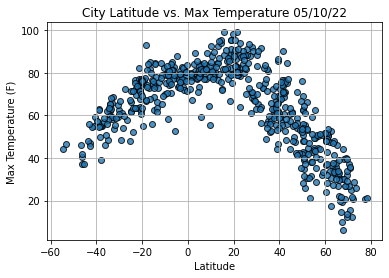

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

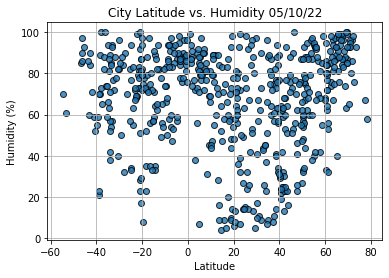

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

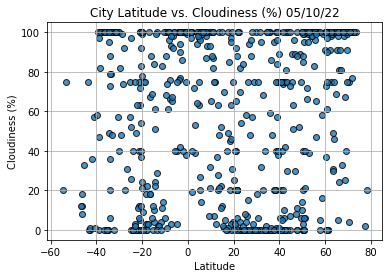

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

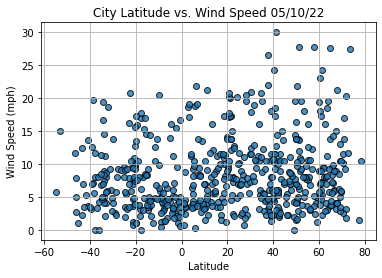

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()